# Data visualization in Jupyter Notebook
Sometimes, one of the best things you can do to see the story is to visualize it -- make it a chart. Agate has some built in charting tools to make this easy. 

In [1]:
import agate

import warnings
warnings.filterwarnings('ignore')

For the purposes of this assignment, I've created a data file called toplots.csv. It's the 20 most ticketed parking lots at UNL over four years. To get that, I used Agate to create a CSV of those top lots. If you want to see how it was done, [it's in the repository](https://github.com/mattwaite/JOUR407-Data-Journalism/blob/master/Assignments/ChartAssignment/TopTicketTable.ipynb).

In [2]:
lots = agate.Table.from_csv('../../Data/toplots.csv')

So let's see what we've got to work with. 

In [3]:
print(lots)

| column   | data_type |
| -------- | --------- |
| Location | Text      |
| count    | Number    |



So you've used `print_table` before. The simplest chart in Agate is `print_bars`. It looks like this. 

In [5]:
lots.print_bars('Location', 'count', width=80)

Location                    count
South Stadium               5,683 ▓░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░  
14th & W Street             5,034 ▓░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░       
Inside Loop                 3,275 ▓░░░░░░░░░░░░░░░░░░░░░░░░░                    
Harper Schramm Smith        3,256 ▓░░░░░░░░░░░░░░░░░░░░░░░░                     
North Stadium               2,604 ▓░░░░░░░░░░░░░░░░░░░░                         
East Union                  2,599 ▓░░░░░░░░░░░░░░░░░░░                          
Sandoz                      2,228 ▓░░░░░░░░░░░░░░░░░                            
19th Street/R-U Street      1,875 ▓░░░░░░░░░░░░░░                               
14th & Avery Parking Garage 1,741 ▓░░░░░░░░░░░░░                                
13th & R Lot                1,686 ▓░░░░░░░░░░░░░                                
Loop                        1,649 ▓░░░░░░░░░░░░                                 
Dental North                1,294 ▓░░░░░░░░░░                              

So, as you can probably surmise, `print_bars` takes in two required parameters, the first is the label, the second is the number you want to be represented in bars. The `width=80` part is optional -- it just sets a width so it looks better in my browser.

The very same data can be made into a better looking chart using `bar_chart` instead of `print_bars` 

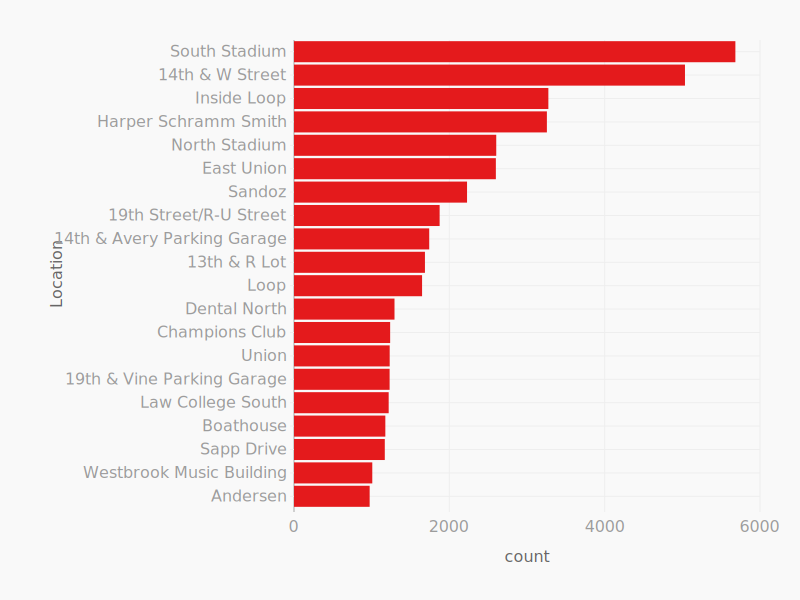

In [6]:
lots.bar_chart('Location', 'count')

In this example, the two required parameters are still there -- the label and the count. A handy optional parameter is a file path -- `'myproject/charts/bar_chart.svg'` -- that will output the file as an SVG file. SVG stands for Scalable Vector Graphic, which you import into a program like Illustrator to clean up. 

Let's walk through a little more complex example, using the UNL crime data we used for our Data Smells assignment. 

In [7]:
crime = agate.Table.from_csv('../../Data/unlcrime.csv')

In [18]:
print(crime)

| column         | data_type |
| -------------- | --------- |
| Case #         | Text      |
| Incident Code  | Text      |
| Reported       | DateTime  |
| Case Status    | Text      |
| Start Occurred | DateTime  |
| End Occurred   | DateTime  |
| Building       | Text      |
| Location       | Text      |
| Stolen         | Number    |
| Damaged        | Number    |
| Description    | Text      |



So something we might want to know is how has Minor in Possession evolved over time? So to do that, we need a couple of things:

1. To select MIP cases.
2. To create a field where we can store what year the incident occurred so we can group on it.
3. Group on those years.
4. Count those years.
5. Chart it out. 

Luckily, we've done steps 1-4 before. 

In [15]:
mip = crime.where(lambda row: row['Incident Code'] == 'ALCOHOL - MINOR IN POSSESSION').where()

mip_with_years = mip.compute([
    ('reported_year', agate.Formula(agate.Number(), lambda row: '%s' % row['Reported'].year))
])

years = mip_with_years.group_by('reported_year')

year_counts = years.aggregate([
    ('count', agate.Count())
])

So now all that is left to do is chart it. Note above that my years are a number. I did that because the charting library needs a number, so I fed it one. Date charts are better as line charts, in my opinion, so we'll use the line charting function. 

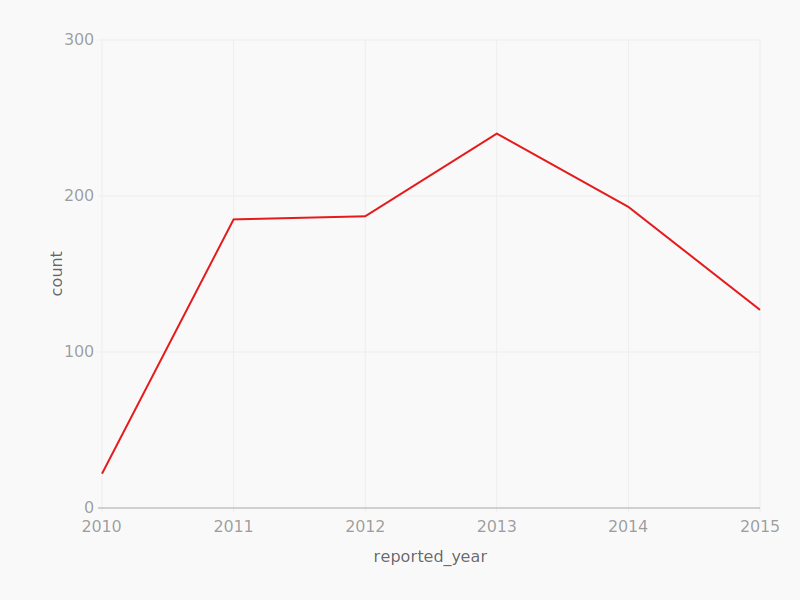

In [16]:
year_counts.order_by('reported_year').line_chart('reported_year', 'count')

## Assignment

Using [this dataset](https://www.dropbox.com/s/ddcpkc8no2t959e/lpdarrests.csv?dl=0) of all arrests and citations issued by LPD from 2014-2016, produce three charts of your choosing. You can find out [more information about the data here](http://opendata.lincoln.ne.gov/datasets/lpd-arrests-and-citations-2016). [More information about charting can be found here](http://agate.readthedocs.io/en/1.6.0/cookbook/charting.html).  